In [0]:
import numpy as np
import pandas as pd

import json
import urllib
import datetime

import matplotlib.pyplot as plt

In [0]:
from google.colab import files

In [0]:
movieData = pd.read_pickle('movieData.pkl')
movielist = pd.read_pickle('movielist.pkl')

FileNotFoundError: ignored

## 10위까지의 영화만 사용해도 되는지 판단

In [0]:
movieData[['Date', 'salesShare']].groupby('Date').sum().mean()

salesShare    92.675883
dtype: float64

# EDA

## Original 그래프

### 요일을 고려한 x축 만들기

In [0]:
import copy
temp = copy.deepcopy(movieData)
temp['x'] = temp['dayCnt'] - temp['openDay']

### Group 만들기

In [0]:
movieList = movieData.drop_duplicates(['movieCd'], keep='last')[['movieCd','movieNm','audiAcc']].reset_index(drop=True)

In [0]:
movieOver1000 = movieList[movieList['audiAcc']>=10000000][['movieCd', 'movieNm']].drop_duplicates().reset_index(drop=True)
movieOver800 = movieList[(movieList['audiAcc']>=8000000)&(movieList['audiAcc']<10000000)][['movieCd', 'movieNm']].drop_duplicates().reset_index(drop=True)
movieOver600 = movieList[(movieList['audiAcc']>=6000000)&(movieList['audiAcc']<8000000)][['movieCd', 'movieNm']].drop_duplicates().reset_index(drop=True)
movieOver400 = movieList[(movieList['audiAcc']>=4000000)&(movieList['audiAcc']<6000000)][['movieCd', 'movieNm']].drop_duplicates().reset_index(drop=True)
movieOver200 = movieList[(movieList['audiAcc']>=2000000)&(movieList['audiAcc']<4000000)][['movieCd', 'movieNm']].drop_duplicates().reset_index(drop=True)
movieUnder200 = movieList[movieList['audiAcc']<2000000][['movieCd', 'movieNm']].drop_duplicates().reset_index(drop=True)

### 1000만

In [0]:
len(movieOver1000)

10

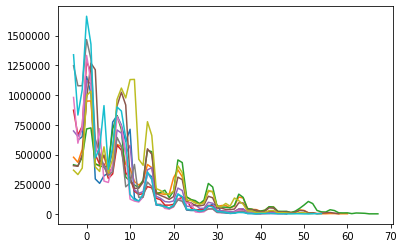

In [0]:
for i in movieOver1000['movieCd']:
    plt.plot(temp[temp['movieCd']==i]['x'],temp[temp['movieCd']==i]['audiCnt'])

### 800만

In [0]:
len(movieOver800)

5

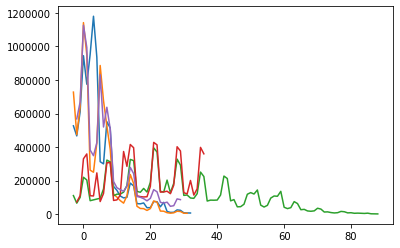

In [0]:
for i in movieOver800['movieCd']:
    plt.plot(temp[temp['movieCd']==i]['x'],temp[temp['movieCd']==i]['audiCnt'])

### 600만

In [0]:
len(movieOver600)

18

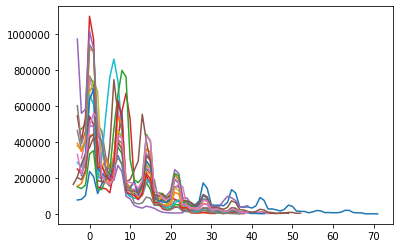

In [0]:
for i in movieOver600['movieCd']:
    plt.plot(temp[temp['movieCd']==i]['x'],temp[temp['movieCd']==i]['audiCnt'])

### 400만

In [0]:
len(movieOver400)

26

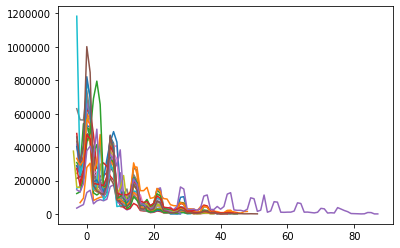

In [0]:
for i in movieOver400['movieCd']:
    plt.plot(temp[temp['movieCd']==i]['x'],temp[temp['movieCd']==i]['audiCnt'])

### 200만

In [0]:
len(movieOver200)

81

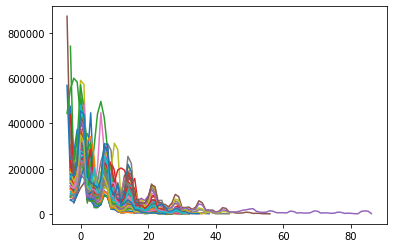

In [0]:
for i in movieOver200['movieCd']:
    plt.plot(temp[temp['movieCd']==i]['x'],temp[temp['movieCd']==i]['audiCnt'])

### 200만 아래

In [0]:
len(movieUnder200)

951

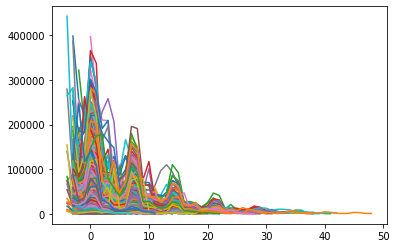

In [0]:
for i in movieUnder200['movieCd']:
    plt.plot(temp[temp['movieCd']==i]['x'],temp[temp['movieCd']==i]['audiCnt'])

## Decomposition

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
temp = copy.deepcopy(movieData)
temp['x'] = temp['dayCnt'] - temp['openDay']

In [0]:
temp.x = temp.x+7#datetime.timedelta(day=)

In [0]:
temp.x = datetime.datetime(2019, 1, 1) + temp.x.apply(datetime.timedelta)

In [0]:
#temp.x = pd.to_datetime(2019, 1, temp.x)
temp.set_index('x', inplace=True)

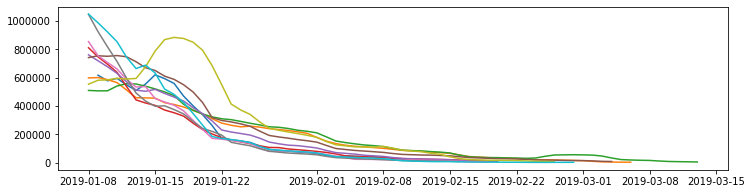

In [0]:
plt.figure(figsize=(12, 3))
for i in movieOver1000['movieCd']:
    y = temp[temp['movieCd']==i]['audiCnt']
    y = y.astype(float) # force float
    decomposition = seasonal_decompose(y)
    trend = decomposition.trend
plt.plot(trend, label='Trend')    
plt.show()

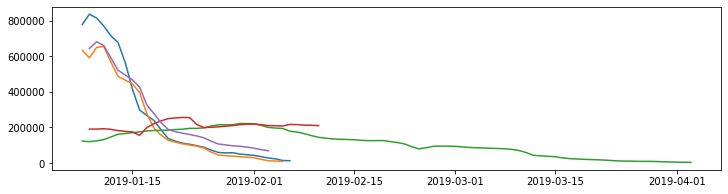

In [0]:
plt.figure(figsize=(12, 3))
for i in movieOver800['movieCd']:
    y = temp[temp['movieCd']==i]['audiCnt']
    y = y.astype(float) # force float
    decomposition = seasonal_decompose(y)
    trend = decomposition.trend
    plt.plot(trend, label='Trend')
plt.show()

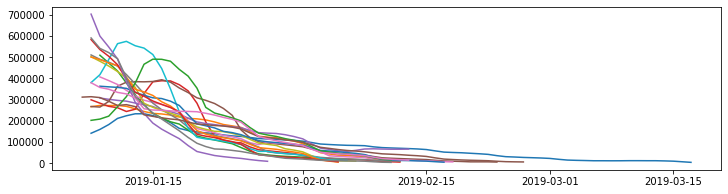

In [0]:
plt.figure(figsize=(12, 3))
for i in movieOver600['movieCd']:
    y = temp[temp['movieCd']==i]['audiCnt']
    y = y.astype(float) # force float
    decomposition = seasonal_decompose(y)
    trend = decomposition.trend
    plt.plot(trend, label='Trend')
plt.show()

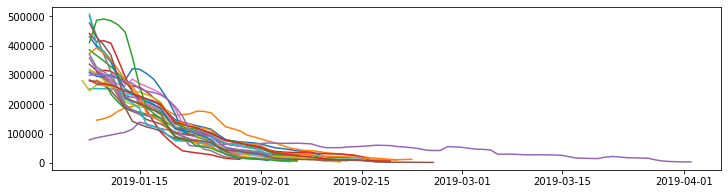

In [0]:
plt.figure(figsize=(12, 3))
for i in movieOver400['movieCd']:
    y = temp[temp['movieCd']==i]['audiCnt']
    y = y.astype(float) # force float
    decomposition = seasonal_decompose(y)
    trend = decomposition.trend
    plt.plot(trend, label='Trend')
plt.show()

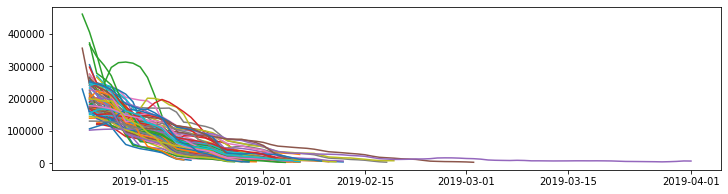

In [0]:
plt.figure(figsize=(12, 3))
for i in movieOver200['movieCd']:
    y = temp[temp['movieCd']==i]['audiCnt']
    y = y.astype(float) # force float
    decomposition = seasonal_decompose(y)
    trend = decomposition.trend
    plt.plot(trend, label='Trend')
plt.show()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

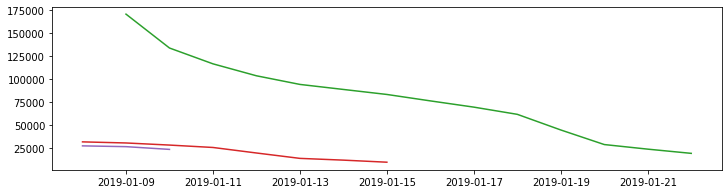

In [0]:
plt.figure(figsize=(12, 3))
for i in movieUnder200['movieCd']:
    y = temp[temp['movieCd']==i]['audiCnt']
    y = y.astype(float) # force float
    decomposition = seasonal_decompose(y)
    trend = decomposition.trend
    plt.plot(trend, label='Trend')
plt.show()